# Proyek Analisis Data: E-Commerce Public
- Nama: Dimas Jalu Pamungkas Suwarsono
- Email: dimasjps@gmail.com
- Id Dicoding: 

## Menentukan Pertanyaan Bisnis

- Bagaimana performa penjualan kategori barang yang memiliki score review rendah?
- Kota dengan jumlah order atau pembeli paling banyak?

## Menyaipkan semua library yang dibuthkan

Untuk melakukan analisa data dengan menggunakan Python, diperlukan libraries untuk mempermudah proses analisa. Maka perlu dilakukan import libraries seperti pandas, numpy, matplotlib, dan seaborn.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Setelah dilakukannya import libraries, dapat dilakukan import dataset dengan bantuan librarie pandas untuk membaca 6 dataset, diantaranya adalah:

In [2]:
order_items_df = pd.read_csv("D:\Dimas Jalu P S\Dataset\E-commerce-public-dataset\E-Commerce Public Dataset\order_items_dataset.csv")
review_df = pd.read_csv("D:\Dimas Jalu P S\Dataset\E-commerce-public-dataset\E-Commerce Public Dataset\order_reviews_dataset.csv")
product_brz_df = pd.read_csv("D:\Dimas Jalu P S\Dataset\E-commerce-public-dataset\E-Commerce Public Dataset\products_dataset.csv")
product_translate_df = pd.read_csv("D:\Dimas Jalu P S\Dataset\E-commerce-public-dataset\E-Commerce Public Dataset\product_category_name_translation.csv")
orders_df = pd.read_csv("D:\Dimas Jalu P S\Dataset\E-commerce-public-dataset\E-Commerce Public Dataset\orders_dataset.csv")
seller_df = pd.read_csv("D:\Dimas Jalu P S\Dataset\E-commerce-public-dataset\E-Commerce Public Dataset\sellers_dataset.csv")
customer_df = pd.read_csv("D:\Dimas Jalu P S\Dataset\E-commerce-public-dataset\E-Commerce Public Dataset\customers_dataset.csv")

Untuk menjawab nomer 1 diperlukan penggabungan 4 tabel yaitu order_item, review, product_brz, dan product_translate.
Karena nama kategori produk masih dalam bahasa brazil, maka diperlukan merge dataset produk dalam bahasa brazil dan nama produk dalam bahasa inggris.

In [3]:
category_df = pd.merge(
    left = product_brz_df,
    right = product_translate_df,
    how = "inner",
    left_on = "product_category_name",
    right_on = "product_category_name"
)

category_df. head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,6a2fb4dd53d2cdb88e0432f1284a004c,perfumaria,39.0,346.0,2.0,400.0,27.0,5.0,20.0,perfumery
2,0d009643171aee696f4733340bc2fdd0,perfumaria,52.0,150.0,1.0,422.0,21.0,16.0,18.0,perfumery
3,b1eae565a61935e0011ee7682fef9dc9,perfumaria,49.0,460.0,2.0,267.0,17.0,13.0,17.0,perfumery
4,8da90b37f0fb171b4877c124f965b1f6,perfumaria,56.0,733.0,3.0,377.0,18.0,13.0,15.0,perfumery


In [4]:
category_df.drop(category_df.columns[[2,3,4,5,6,7,8]],axis=1, inplace=True)
category_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32328 entries, 0 to 32327
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_id                     32328 non-null  object
 1   product_category_name          32328 non-null  object
 2   product_category_name_english  32328 non-null  object
dtypes: object(3)
memory usage: 757.8+ KB


In [5]:
order_review_df = pd.merge(
    left = order_items_df,
    right = review_df,
    how = "inner",
    right_on = "order_id",
    left_on = "order_id"
)
order_review_df.info() #order item int

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112372 entries, 0 to 112371
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   order_id                 112372 non-null  object 
 1   order_item_id            112372 non-null  int64  
 2   product_id               112372 non-null  object 
 3   seller_id                112372 non-null  object 
 4   shipping_limit_date      112372 non-null  object 
 5   price                    112372 non-null  float64
 6   freight_value            112372 non-null  float64
 7   review_id                112372 non-null  object 
 8   review_score             112372 non-null  int64  
 9   review_comment_title     13434 non-null   object 
 10  review_comment_message   47642 non-null   object 
 11  review_creation_date     112372 non-null  object 
 12  review_answer_timestamp  112372 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 11.1+ MB


In [6]:
order_review_df.drop(order_review_df.columns[[3,4,7,9,10,11,12]],axis=1, inplace=True)
order_review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112372 entries, 0 to 112371
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   order_id       112372 non-null  object 
 1   order_item_id  112372 non-null  int64  
 2   product_id     112372 non-null  object 
 3   price          112372 non-null  float64
 4   freight_value  112372 non-null  float64
 5   review_score   112372 non-null  int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 5.1+ MB


In [13]:
product_order_review_df = pd.merge(
    left = order_review_df,
    right = category_df,
    how = "inner",
    left_on = "product_id",
    right_on = "product_id"
)
product_order_review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110750 entries, 0 to 110749
Data columns (total 8 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       110750 non-null  object 
 1   order_item_id                  110750 non-null  int64  
 2   product_id                     110750 non-null  object 
 3   price                          110750 non-null  float64
 4   freight_value                  110750 non-null  float64
 5   review_score                   110750 non-null  int64  
 6   product_category_name          110750 non-null  object 
 7   product_category_name_english  110750 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 6.8+ MB


Selanjutnya untuk mengetahui data customer yang pernah melakukan transaksi, dapat dilakukan merge dari 2 dataset, yaitu customer_df dan orders_df

In [7]:
customer_order_df = pd.merge(
    left = customer_df,
    right = orders_df,
    how = "inner",
    left_on = "customer_id",
    right_on = "customer_id"
)
customer_order_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   customer_id                    99441 non-null  object
 1   customer_unique_id             99441 non-null  object
 2   customer_zip_code_prefix       99441 non-null  int64 
 3   customer_city                  99441 non-null  object
 4   customer_state                 99441 non-null  object
 5   order_id                       99441 non-null  object
 6   order_status                   99441 non-null  object
 7   order_purchase_timestamp       99441 non-null  object
 8   order_approved_at              99281 non-null  object
 9   order_delivered_carrier_date   97658 non-null  object
 10  order_delivered_customer_date  96476 non-null  object
 11  order_estimated_delivery_date  99441 non-null  object
dtypes: int64(1), object(11)
memory usage: 9.1+ MB


In [8]:
customer_order_df.drop(customer_order_df.columns[[2,6,7,8,9,10,11]],axis=1, inplace=True)
customer_order_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         99441 non-null  object
 1   customer_unique_id  99441 non-null  object
 2   customer_city       99441 non-null  object
 3   customer_state      99441 non-null  object
 4   order_id            99441 non-null  object
dtypes: object(5)
memory usage: 3.8+ MB


### Assessing Data

In [21]:
product_order_review_df[product_order_review_df.order_id.duplicated()]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_category_name,product_category_name_english
55,398545ae905dad286c70f01c7e7311e1,2,d63c1011f49d98b976c352955b1c4bea,cc419e0650a3c5ba77189a1882b7556a,2018-04-12 03:28:44,59.99,19.39,fce2fd5d7a5775c8bf4e7186cd00aab3,5,Ótimo,"O produto foi entregue antes do prazo, em perf...",2018-04-29 00:00:00,2018-04-29 19:40:25,beleza_saude,health_beauty
60,41c45378fe62363faf80c45523a198f1,2,d63c1011f49d98b976c352955b1c4bea,cc419e0650a3c5ba77189a1882b7556a,2017-07-25 05:50:19,49.99,8.72,15751113f34ccc2f93a152e855ebfa37,5,NaN,NaN,2017-07-21 00:00:00,2017-07-24 10:31:42,beleza_saude,health_beauty
68,7753606fb1d0067848f8a1a7ae5abefa,2,d63c1011f49d98b976c352955b1c4bea,cc419e0650a3c5ba77189a1882b7556a,2018-05-08 15:58:53,59.99,8.88,c78a6fcd085d678131199a80be88fec6,4,Produto errado,"Veio com a voltagem 220,sendo que pedi 110",2018-05-18 00:00:00,2018-05-26 05:08:43,beleza_saude,health_beauty
76,9e52b130c2b57f5dbff34caec0e04467,2,d63c1011f49d98b976c352955b1c4bea,cc419e0650a3c5ba77189a1882b7556a,2018-01-15 20:08:22,59.99,16.18,6fc047623de3c1be11b2ee6e81d1efe2,4,NaN,NaN,2018-01-18 00:00:00,2018-01-19 08:38:05,beleza_saude,health_beauty
98,f0496c5b6508ecfdf0af4c67896dda41,2,f177554ea93259a5b282f24e33f65ab6,8602a61d680a10a82cceeeda0d99ea3d,2017-10-24 01:10:50,45.00,7.78,41930cc621ab6b5ef58580c2087fb546,5,NaN,NaN,2017-10-20 00:00:00,2017-10-21 12:18:34,fashion_bolsas_e_acessorios,fashion_bags_accessories
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110722,ffb18bf111fa70edf316eb0390427986,2,e86b81dcac341ea01df0260077cdf082,a08692680c77d30a0b4280da5df01c5a,2017-12-01 13:39:22,99.00,9.65,2ff8c02dd6b39252a7af2801a9559ae6,5,NaN,Loja entrou em contato para confirmar a tenção...,2017-12-06 00:00:00,2017-12-11 13:49:59,informatica_acessorios,computers_accessories
110724,ffb8f7de8940249a3221252818937ecb,3,bd0ac51dc93e62c4dbe6ca9d70a9b311,1d4587203296c8f4ad134dc286fa6db0,2018-07-27 09:04:32,64.50,42.47,72670cacdf95d373cc638d30551de3aa,4,NaN,NaN,2018-08-01 00:00:00,2018-08-03 19:24:11,automotivo,auto
110734,ffd6f465cab015b452d398ac1f5d978a,2,fdcf45aa23bb8312ecc0027d6e1ef1c4,113e3a788b935f48aad63e1c41dac1bd,2018-05-03 09:30:37,7.84,22.06,cb864e5bb7299e87df2bf1eb66fddbcd,4,Ótimo,"O produto chegou antes da data prevista, é tud...",2018-05-04 00:00:00,2018-05-05 01:32:43,artigos_de_natal,christmas_supplies
110735,ffd6f465cab015b452d398ac1f5d978a,3,fdcf45aa23bb8312ecc0027d6e1ef1c4,113e3a788b935f48aad63e1c41dac1bd,2018-05-03 09:30:37,7.84,22.06,cb864e5bb7299e87df2bf1eb66fddbcd,4,Ótimo,"O produto chegou antes da data prevista, é tud...",2018-05-04 00:00:00,2018-05-05 01:32:43,artigos_de_natal,christmas_supplies


In [14]:
product_order_review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110750 entries, 0 to 110749
Data columns (total 8 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       110750 non-null  object 
 1   order_item_id                  110750 non-null  int64  
 2   product_id                     110750 non-null  object 
 3   price                          110750 non-null  float64
 4   freight_value                  110750 non-null  float64
 5   review_score                   110750 non-null  int64  
 6   product_category_name          110750 non-null  object 
 7   product_category_name_english  110750 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 6.8+ MB


Selanjutnya melakukan pengevekan dataset customer_order

In [37]:
customer_order_df.order_id.duplicated().sum() #banyak data duplikat dari order_id

0

In [38]:
customer_order_df.isna().sum() #tidak ada data kosong/ NAN

customer_id           0
customer_unique_id    0
customer_city         0
customer_state        0
order_id              0
dtype: int64

### Cleaning Data

melakukan penghapusan data duplikat pada tabel product_order_review

In [17]:
product_order_review_df = product_order_review_df.drop_duplicates(keep="last", subset=["order_id"])

In [18]:
product_order_review_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96517 entries, 0 to 110749
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       96517 non-null  object 
 1   order_item_id                  96517 non-null  int64  
 2   product_id                     96517 non-null  object 
 3   price                          96517 non-null  float64
 4   freight_value                  96517 non-null  float64
 5   review_score                   96517 non-null  int64  
 6   product_category_name          96517 non-null  object 
 7   product_category_name_english  96517 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 6.6+ MB


Setelah data frame untuk setiap pertanyaan sudah terbentuk, maka dilakukan penyatuan tabel agar data yang ditampilkan memiliki urutan dan jumlah yang sama atau semua data terintegrasi secara keseluruhan

In [39]:
all_df = pd.merge(
    left = customer_order_df,
    right = product_order_review_df,
    how = "inner",
    left_on = "order_id",
    right_on = "order_id"
)
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96517 entries, 0 to 96516
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer_id                    96517 non-null  object 
 1   customer_unique_id             96517 non-null  object 
 2   customer_city                  96517 non-null  object 
 3   customer_state                 96517 non-null  object 
 4   order_id                       96517 non-null  object 
 5   order_item_id                  96517 non-null  int64  
 6   product_id                     96517 non-null  object 
 7   price                          96517 non-null  float64
 8   freight_value                  96517 non-null  float64
 9   review_score                   96517 non-null  int64  
 10  product_category_name          96517 non-null  object 
 11  product_category_name_english  96517 non-null  object 
dtypes: float64(2), int64(2), object(8)
memory usag

In [40]:
all_df.to_csv("all_data.csv", index=False)

## Exploratory Data Analysis (EDA)

### Explore ...

untuk mencari revenue tiap jenis kategori produk, perlu dilakukan pengkalian jumlah item terhadap harga

In [41]:
product_order_review_df["revenue"] = product_order_review_df.order_item_id * product_order_review_df.price
product_order_review_df.groupby(by="product_category_name_english").agg({"review_score":"mean","order_id":"count", "revenue":"sum"}).sort_values(by="review_score", ascending=True)

,review_score,order_id,revenue
product_category_name_english,,,
security_and_services,2.500000,2,283.29
office_furniture,3.622807,1254,266854.17
fashion_male_clothing,3.702703,111,10533.32
diapers_and_hygiene,3.740741,27,1567.59
fashio_female_clothing,3.815789,38,2743.74
...,...,...,...
costruction_tools_tools,4.425532,94,15774.25
books_general_interest,4.461538,507,46345.16
fashion_childrens_clothes,4.500000,8,569.85


## Visualization & Explanatory Analysis

### Pertanyaan 1: 

- Bagaimana performa penjualan terhadap kategori barang yang memiliki score review rendah ?

Untuk mendapatkan data kategori produk dengan review score paling rendah dapat dilakukan dengan metode groupby, dengan mengelompokkan kategori produk lalu menampilkan nilai rata-rata review score dan jumlah order atau pesanan

In [42]:
review_sale_df = all_df.groupby("product_category_name_english").agg({"review_score":"mean","order_id":"count"}).sort_values(by ="review_score",ascending=True).reset_index()
review_sale_df.head(5)

,product_category_name_english,review_score,order_id
0,security_and_services,2.500000,2
1,office_furniture,3.622807,1254
2,fashion_male_clothing,3.702703,111
3,diapers_and_hygiene,3.740741,27
4,fashio_female_clothing,3.815789,38


Setelah mendapatkan data kategori produk dengan nilai score review terendah, dapat dilanjutkan dengan menampilkan visual dengan jenis grafik bar charts

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_6788\2811165573.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="order_id", y="product_category_name_english", data=review_sale_df.head(5), palette=colors)


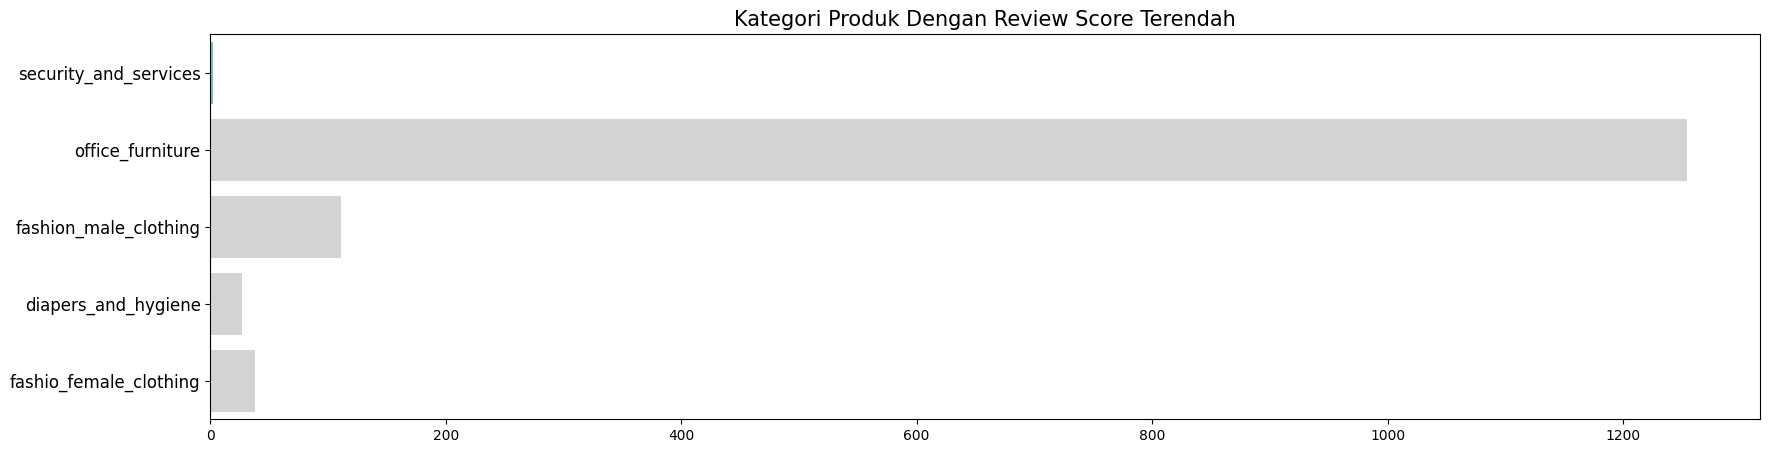

In [43]:
plt.figure(figsize=(20, 5))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
 
sns.barplot(x="order_id", y="product_category_name_english", data=review_sale_df.head(5), palette=colors)
plt.ylabel(None)
plt.xlabel(None)
plt.title("Kategori Produk Dengan Review Score Terendah", loc="center", fontsize=15)
plt.tick_params(axis ='y', labelsize=12)

### Pertanyaan 2: 

- Kota dengan jumlah pembeli paling banyak?

Untuk mendapatkan data kota dengan jumlah pesanan/order paling banyak cukup dilakukan pengambilan data dengan metode value counts

In [34]:
cust = all_df.customer_city.value_counts().head(10)

print(cust)

customer_city
sao paulo                15045
rio de janeiro            6640
belo horizonte            2682
brasilia                  2076
curitiba                  1486
campinas                  1398
porto alegre              1345
salvador                  1194
guarulhos                 1150
sao bernardo do campo      907
Name: count, dtype: int64


Selanjutnya data dilanjutkan dengan penjelasan decara visual dengan menampilkan bar charts tiap kota

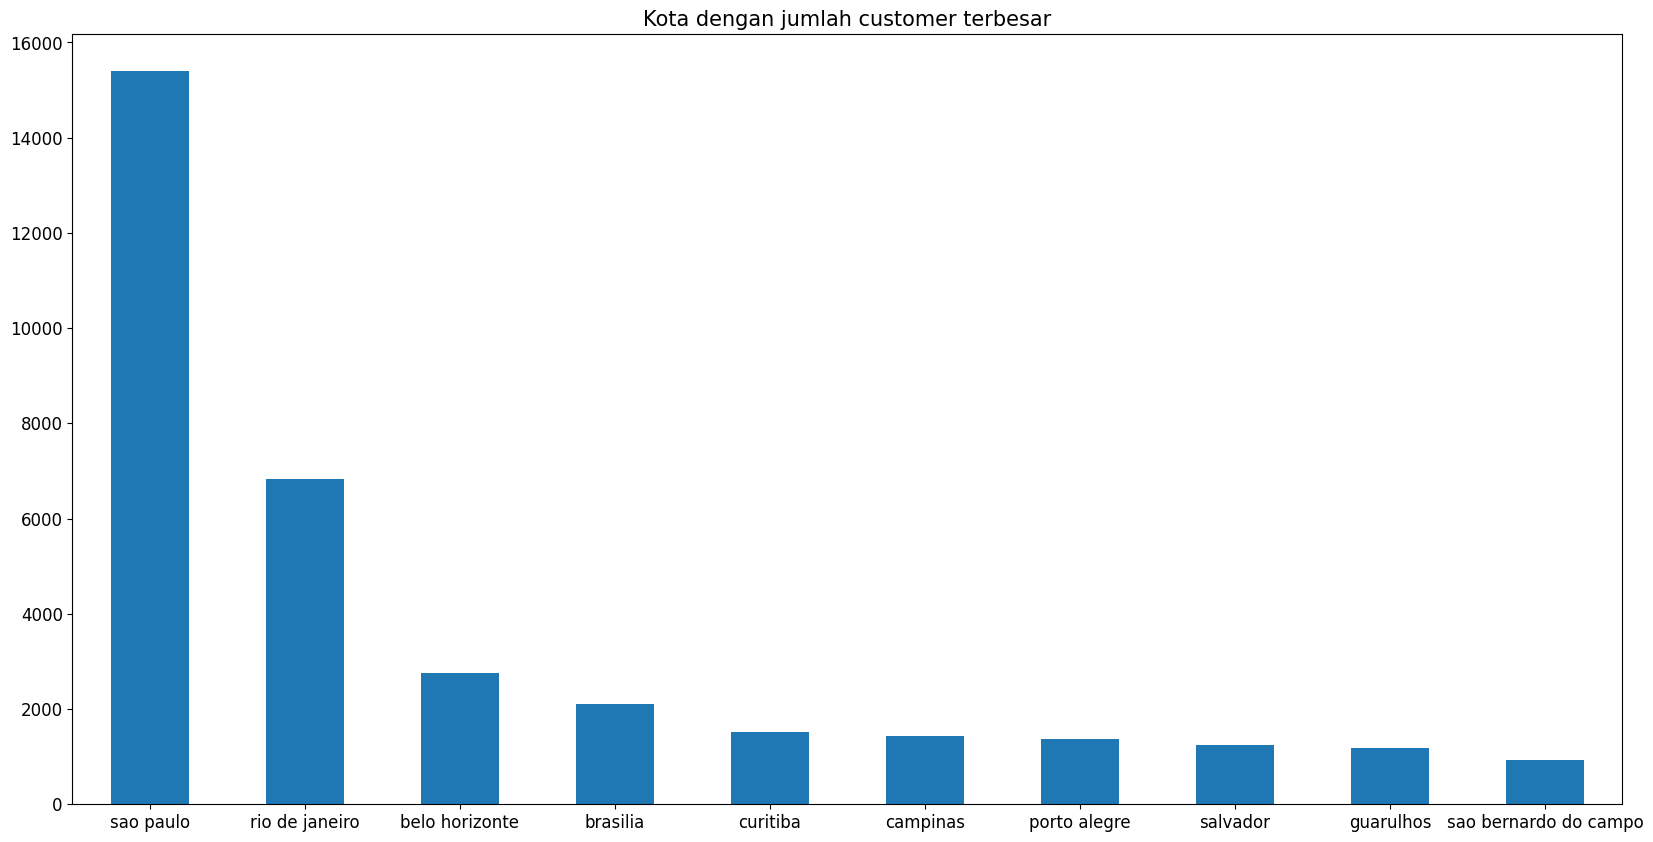

In [74]:
plt.figure(figsize=(20, 10))
pl = cust.plot(kind="bar",rot=0)
plt.ylabel(None)
plt.xlabel(None)
plt.title("Kota dengan jumlah customer terbesar", loc="center", fontsize=15)
plt.tick_params(axis ='y', labelsize=12)
plt.tick_params(axis ='x', labelsize=12)

## Conclusion

Conclusion 1

Kesimpulan dari penjualan dari kategori barang yang memiliki review paling rendah adalah security and services yang memiliki score review sebesaar 2.5 dan hanya terjual sebanyak 2 unit saja. Apabila dilihat dari 4 barang lainnya, review score jenis kategori baranng tidak berpengaruh terhadap jumlah penjualan barang. Hal tersebut dapat dibuktikan dengan kategori barang "offices and furniture" dengan review score 3.6 dapat mencatatkan penjualan sebesar 1254 unit.
Berdasarkan dari angka diatas, dapat dijadikan sebuah acuan bagi perusahaan, bahwa customer tidak terlalu mengutamakan review score dari kategori barang tersebut, melainkan lebih mengutamakan ketersediaan jenis barang yang sesuai dengan kebutuhan customer.

Conclusion 2

Dari 96517 transaksi yag terjadi mulai tahun 2016 hingga 2018, sebanyak 15 ribu order yang masuk berasal dari kota Sao Paulo. Lalu di urutan kedua ada Rio de Jenairo dengan jumlah order tidak sampai setengah kali lipat dari jumlah order yang berasal dari kota Sao Paulo, yakni sebesar 6640 order. Tingginya angka jumlah customer di dua kota tersebut dapat dijadikan sebuah pertimbangan bagi perusahaan untuk lebih memperluas area pemasaran.